In [1]:
import pandas as pd
import sklearn
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
df = pd.read_csv('../data/30_tda.csv')

In [25]:
df

,0,1,2,3,4,5,6,7,8,9,...,831,832,833,834,835,836,837,838,839,label
0,0.55,0.30,0.56,0.34,0.51,0.34,0.47,0.36,0.49,0.35,...,0.48,0.53,0.53,0.58,0.42,0.58,0.48,0.58,0.53,chao
1,0.55,0.30,0.55,0.34,0.51,0.33,0.48,0.33,0.50,0.31,...,0.48,0.53,0.53,0.58,0.42,0.58,0.48,0.58,0.53,chao
2,0.55,0.30,0.55,0.33,0.51,0.33,0.47,0.33,0.49,0.32,...,0.48,0.54,0.54,0.59,0.42,0.59,0.48,0.59,0.53,chao
3,0.56,0.30,0.56,0.34,0.52,0.34,0.47,0.34,0.50,0.32,...,0.49,0.51,0.54,0.56,0.42,0.56,0.49,0.56,0.54,chao
4,0.53,0.32,0.54,0.34,0.50,0.34,0.45,0.34,0.48,0.32,...,0.51,0.53,0.57,0.58,0.46,0.58,0.52,0.57,0.57,chao
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4528,0.40,0.27,0.38,0.30,0.36,0.30,0.39,0.34,0.42,0.36,...,0.49,0.19,0.56,0.25,0.41,0.25,0.48,0.23,0.54,battay
4529,0.20,0.23,0.17,0.26,0.16,0.26,0.22,0.33,0.28,0.34,...,0.42,0.38,0.51,0.39,0.39,0.43,0.40,0.40,0.49,battay
4530,0.45,0.26,0.35,0.33,0.41,0.34,0.47,0.42,0.56,0.46,...,0.61,0.63,0.68,0.64,0.50,0.65,0.62,0.64,0.71,battay
4531,0.64,0.25,0.70,0.33,0.72,0.34,0.61,0.37,0.53,0.40,...,0.50,0.31,0.61,0.37,0.38,0.38,0.46,0.34,0.59,battay


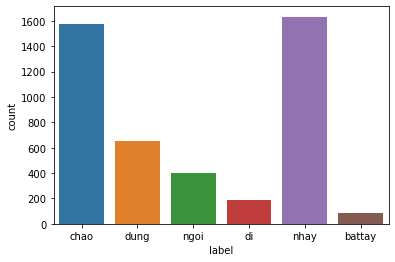

In [26]:
sns.countplot(df.iloc[:, -1])

In [22]:
def draw_pose(pose, ax=None):
    njoints = pose.shape[0]
    # 25 kpts
    connect_joints = (
        (0, 1), (1, 20), (2, 20), (3, 2), (4, 20), (5, 4), (6, 5), (7, 6), (8, 20), (9, 8), (10, 9), (11, 10),
        (12, 0),
        (13, 12), (14, 13), (15, 14), (16, 0), (17, 16), (18, 17), (19, 18), (21, 22), (20, 20), (22, 7), (23, 24),
        (24, 11)
    )
    # 14 kpts
    if njoints == 14:
#         connect_joints = ((0, 13), (1, 13), (2, 1), (3, 2), (4, 13), (5, 4), (6, 5), (7, 13), 
#                           (8, 7), (9, 8), (10, 13), (11, 10), (12, 11))
        
        connect_joints = ((0, 1), (1, 2), (2, 3), (3, 4), (1, 5), (5, 6), (6, 7), (8, 1), 
                          (8, 9), (9, 10), (11, 1), (11, 12), (12, 13))
    plt.figure(figsize=(3, 6))
    plt.xticks(np.arange(0, 1920, step=100))
    plt.yticks(np.arange(0, 1080, step=100))
    for connect_joint in connect_joints:
        first_pt = pose[connect_joint[0]]
        second_pt = pose[connect_joint[1]]
        stack = np.vstack([first_pt, second_pt])
        if ax != None:
          ax.plot(1 - stack[:, 0], 1 - stack[:, 1])
        else:
          plt.plot(1 - stack[:, 0], 1 - stack[:, 1])
    plt.show()

In [20]:
# ACTION_MAP_ID = {
#     0: 'sit down', # sit down
#     1: 'stand up', # stand up
#     2: 'jump', # jump
#     3: 'hand shake', # hand shake
#     4: 'walk', # walk
# }

ACTION_MAP_ID = {
    'ngoi': 0, # sit down
    'dung': 1, # stand up
    'nhay': 2, # jump
    'battay': 3, # hand shake
    'di': 4, # walk
    'chao': 5
}

In [27]:
df['label'] = df['label'].map(ACTION_MAP_ID)

5


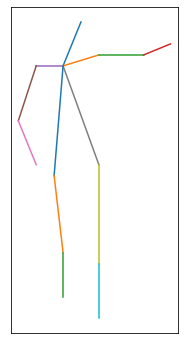

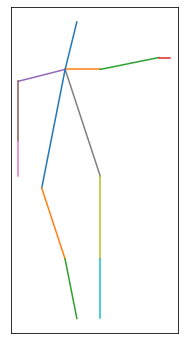

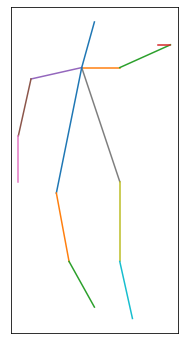

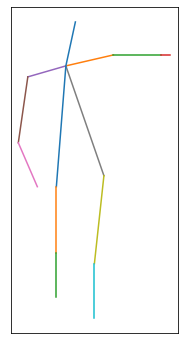

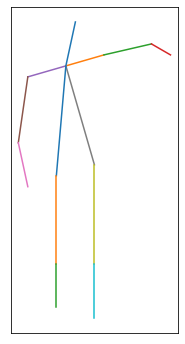

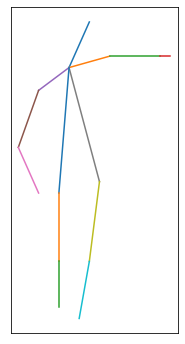

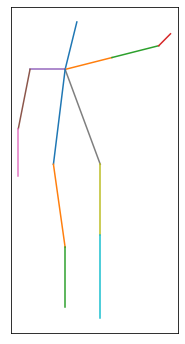

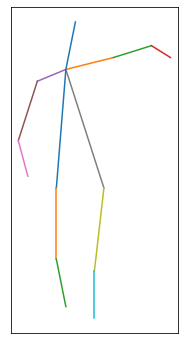

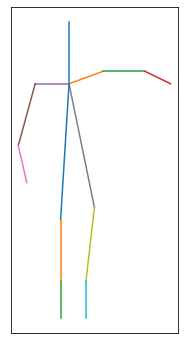

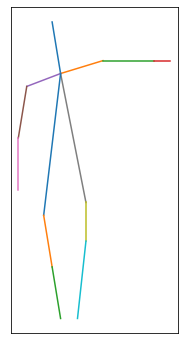

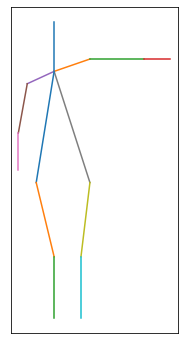

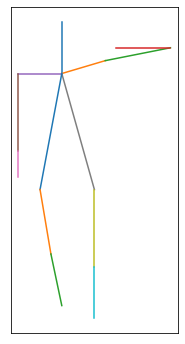

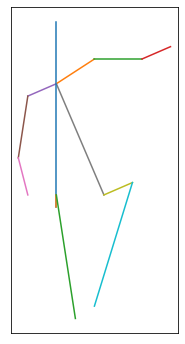

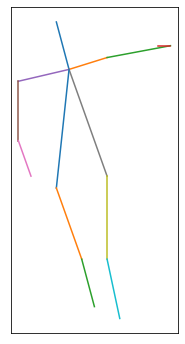

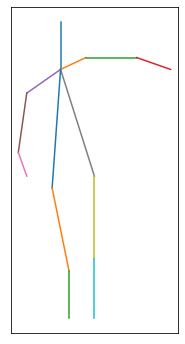

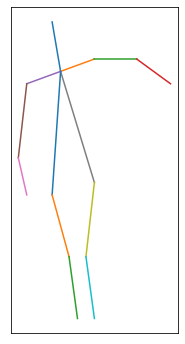

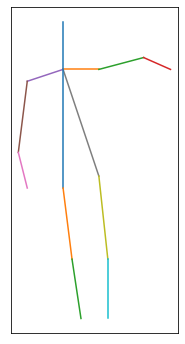

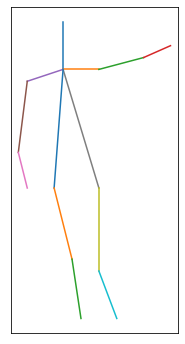

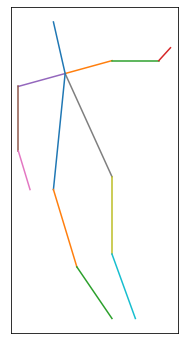

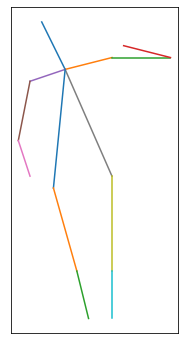

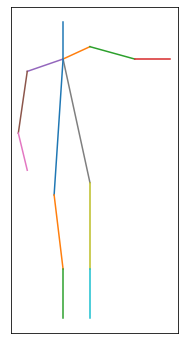

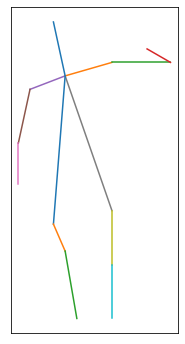

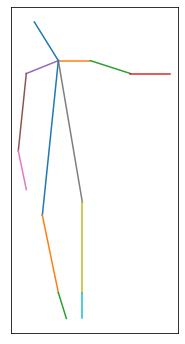

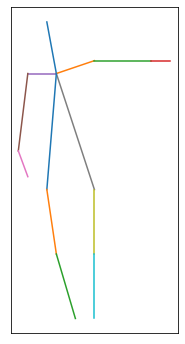

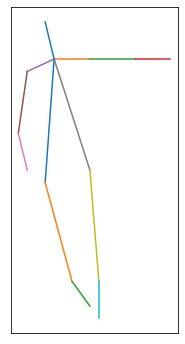

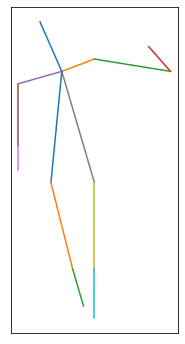

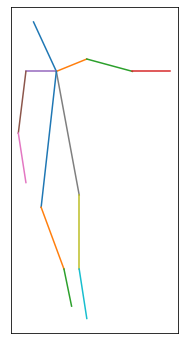

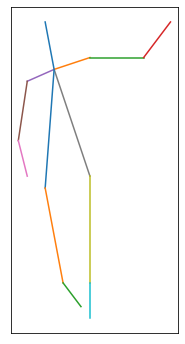

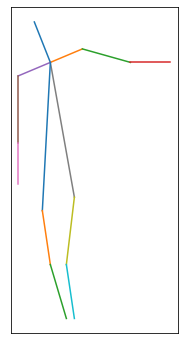

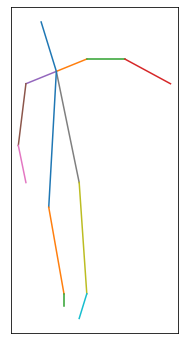

1


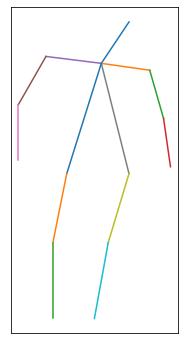

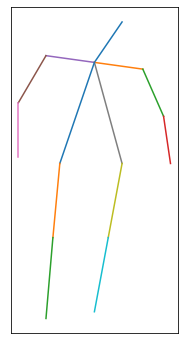

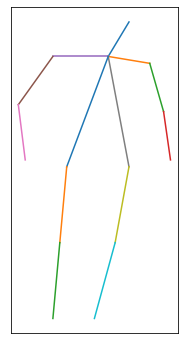

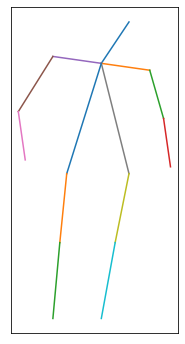

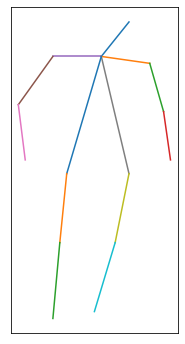

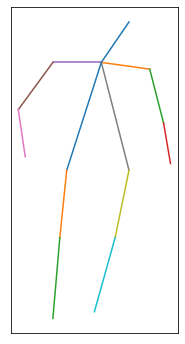

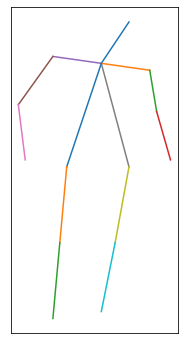

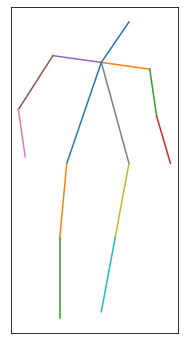

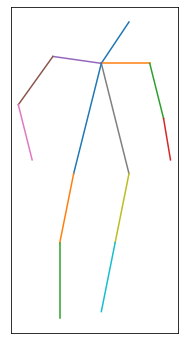

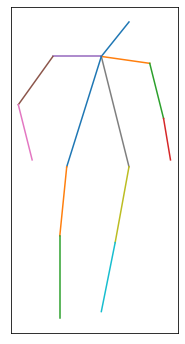

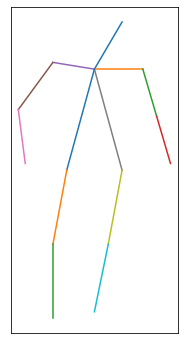

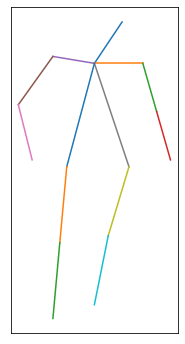

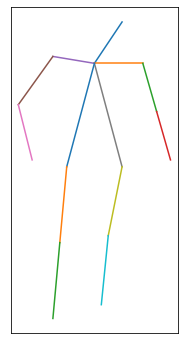

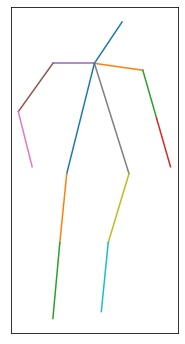

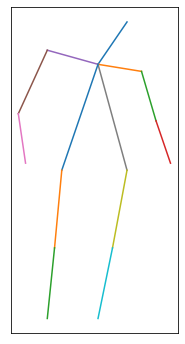

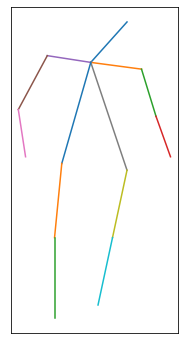

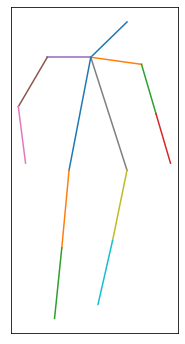

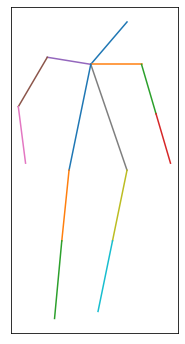

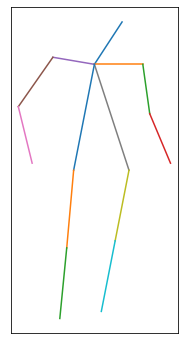

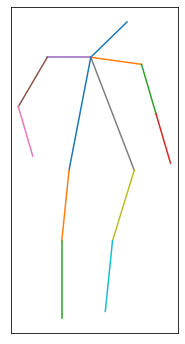

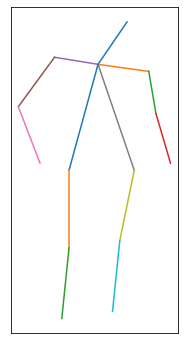

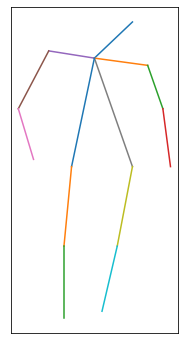

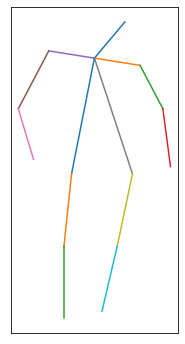

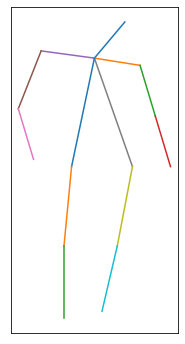

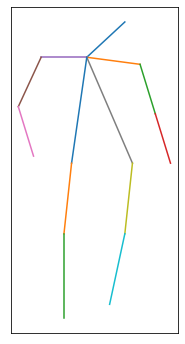

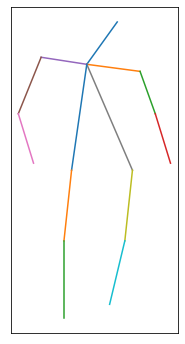

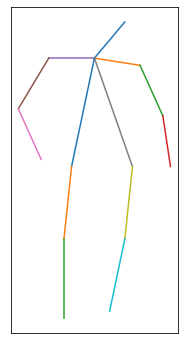

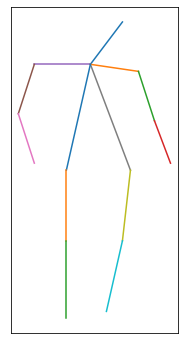

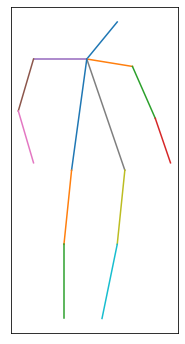

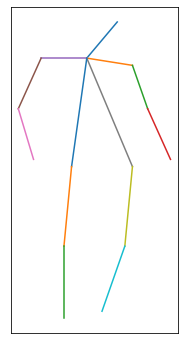

2


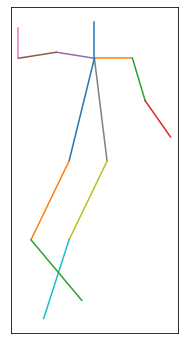

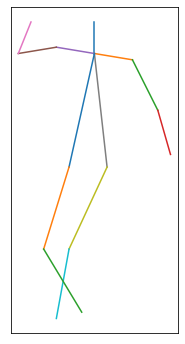

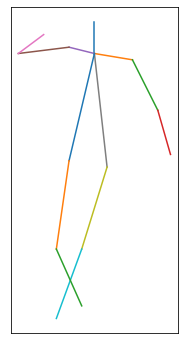

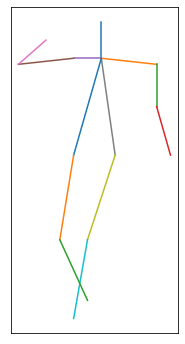

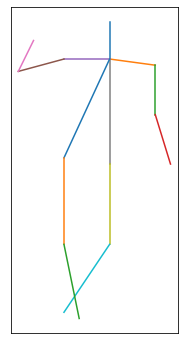

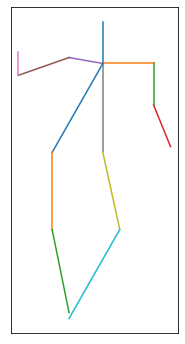

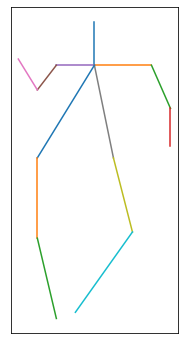

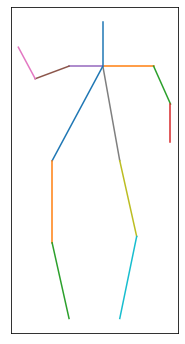

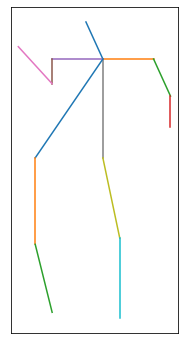

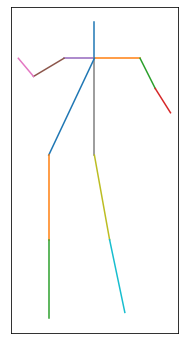

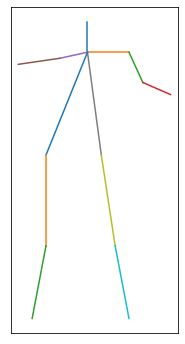

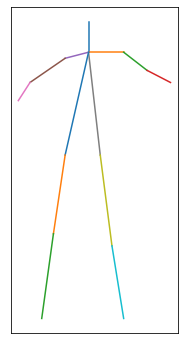

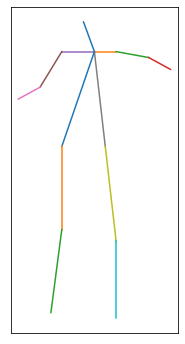

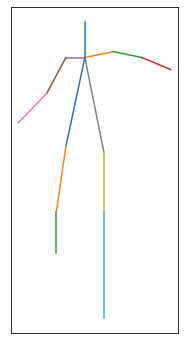

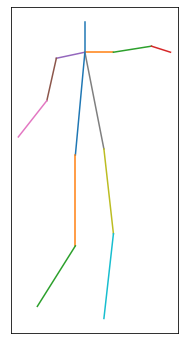

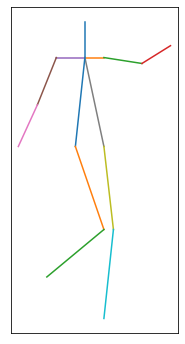

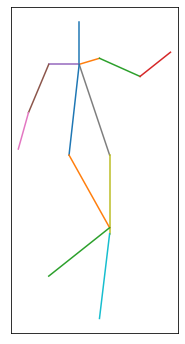

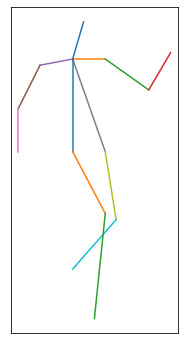

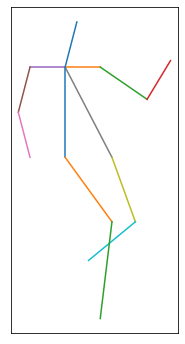

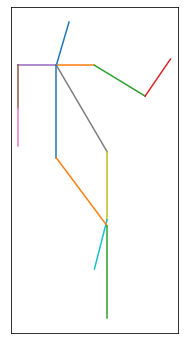

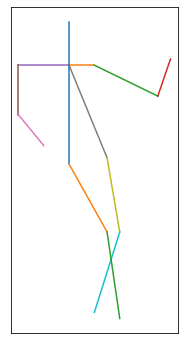

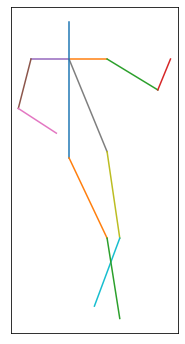

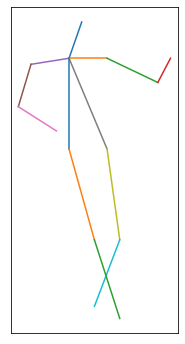

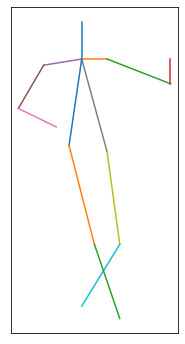

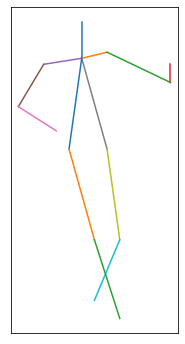

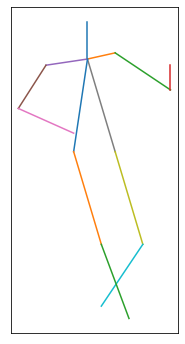

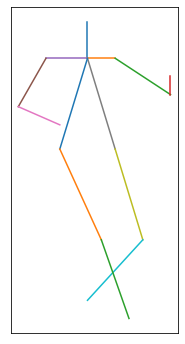

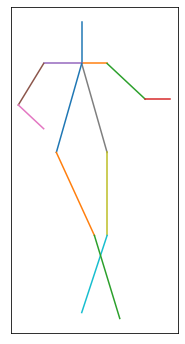

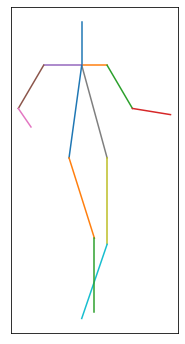

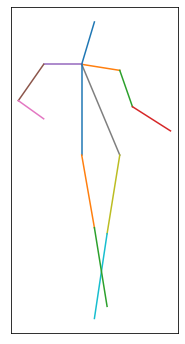

2


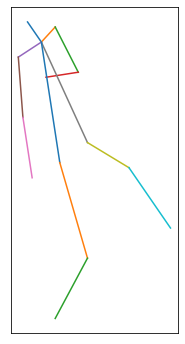

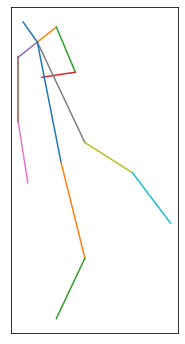

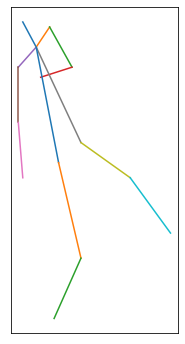

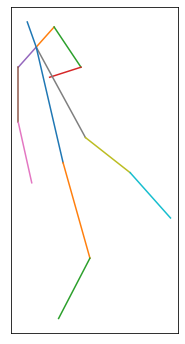

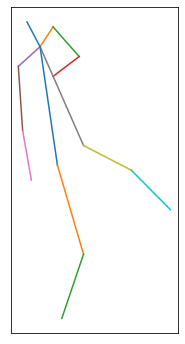

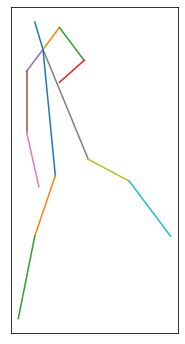

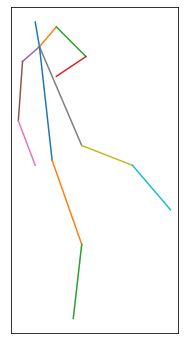

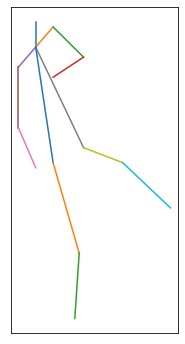

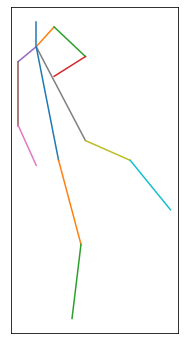

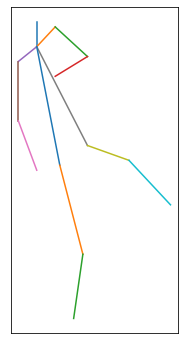

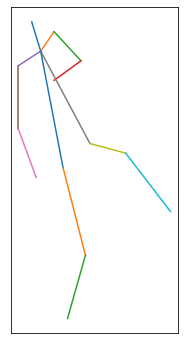

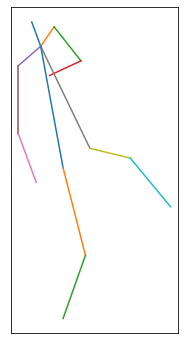

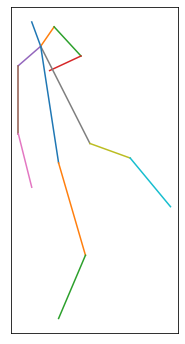

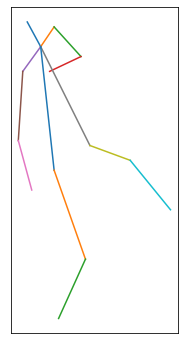

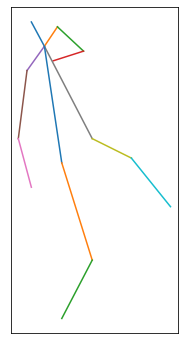

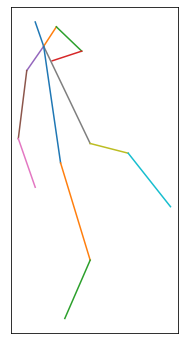

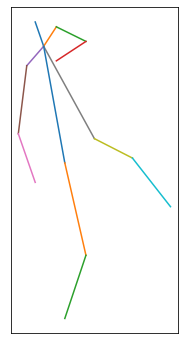

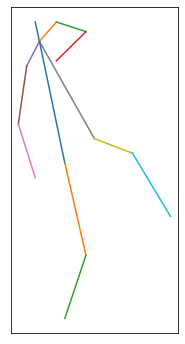

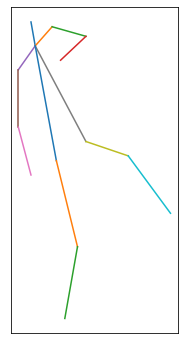

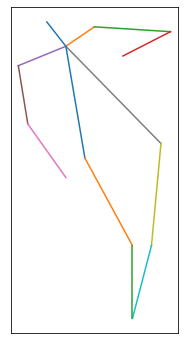

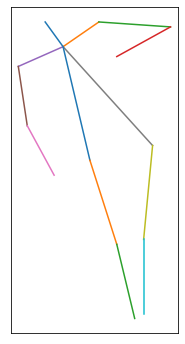

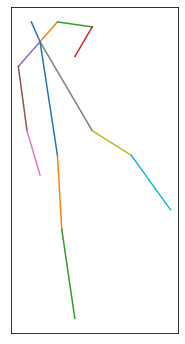

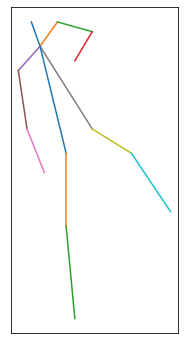

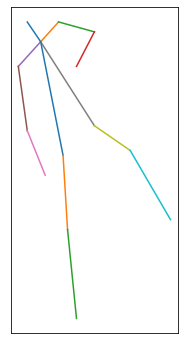

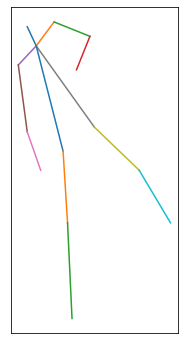

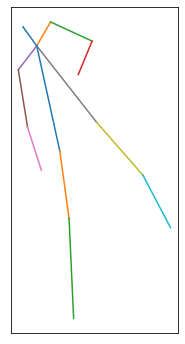

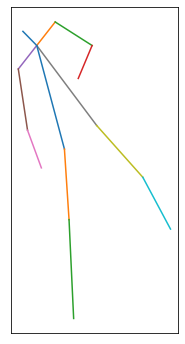

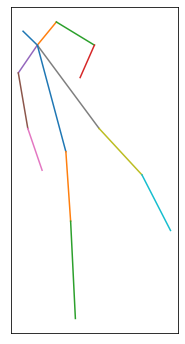

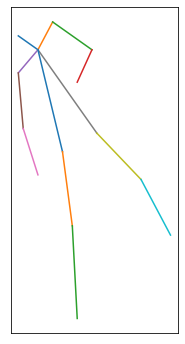

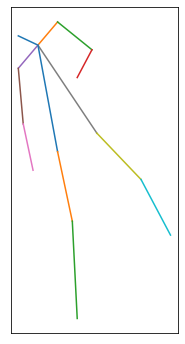

1


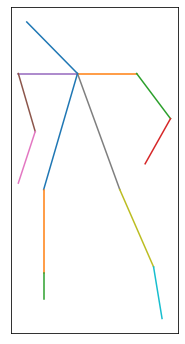

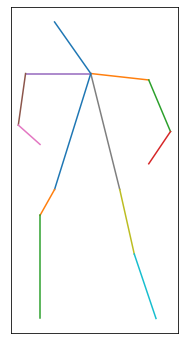

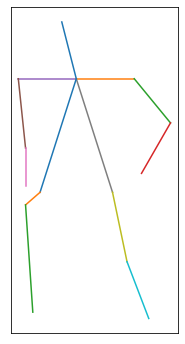

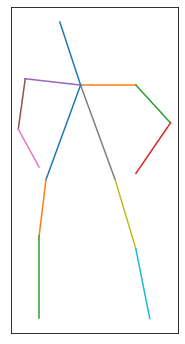

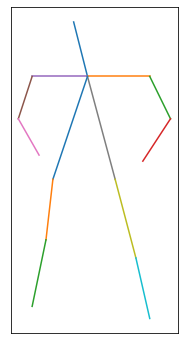

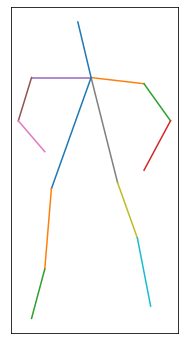

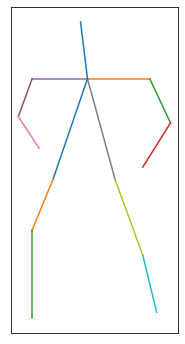

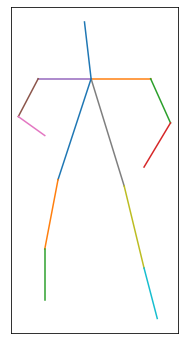

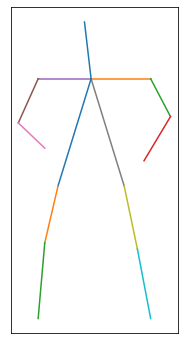

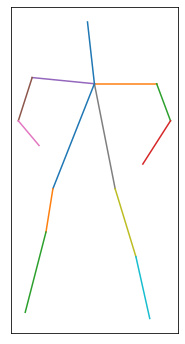

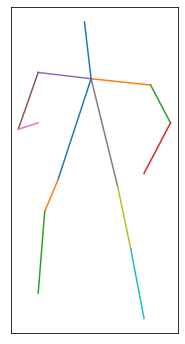

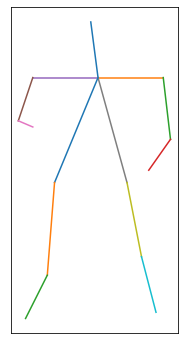

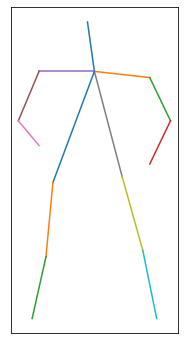

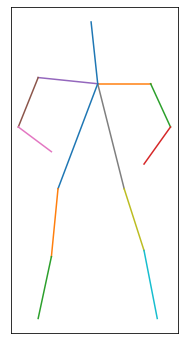

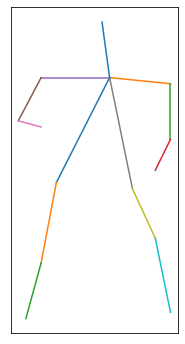

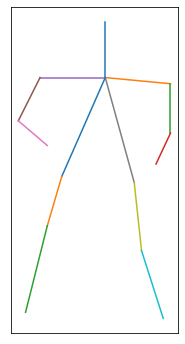

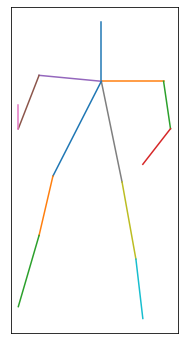

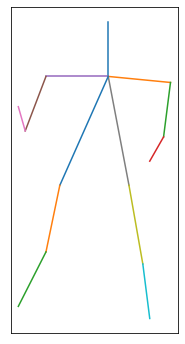

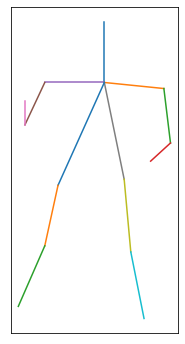

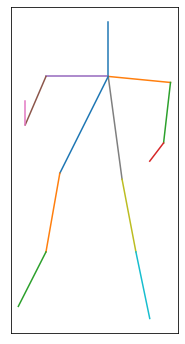

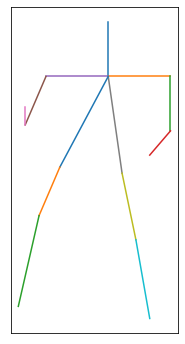

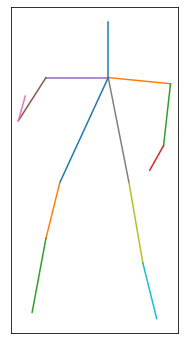

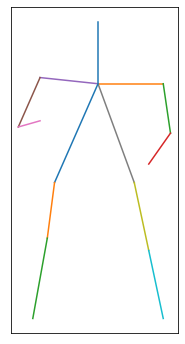

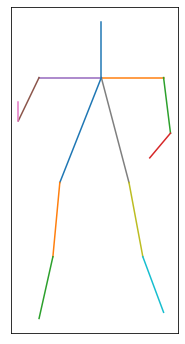

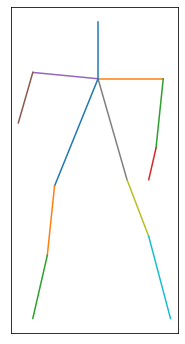

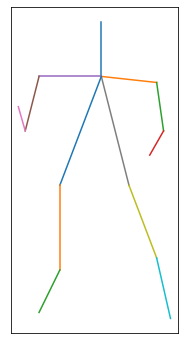

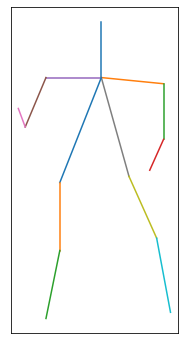

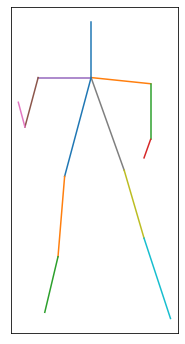

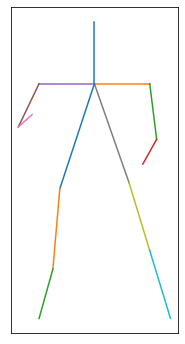

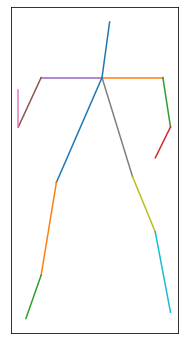

In [23]:
samples = df.sample(5)
X = samples.iloc[:, :-1].to_numpy()
y = samples.iloc[:, -1].to_numpy()

for idx, s in enumerate(X):
    print('=' * 10)
    print(ACTION_MAP_ID[y[idx]])
    poses = s.reshape(30, 14, 2)
    for pose in poses:
        draw_pose(pose)

In [10]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,830,831,832,833,834,835,836,837,838,839
count,4533.000000,4533.000000,4533.000000,4533.000000,4533.000000,4533.000000,4533.000000,4533.000000,4533.000000,4533.000000,...,4533.000000,4533.000000,4533.000000,4533.000000,4533.000000,4533.000000,4533.000000,4533.000000,4533.000000,4533.000000
mean,0.497432,0.253422,0.503049,0.315438,0.451436,0.314121,0.410349,0.361637,0.429991,0.369287,...,0.470483,0.577159,0.474081,0.687075,0.535544,0.477218,0.542643,0.577388,0.538696,0.686724
std,0.106792,0.097277,0.101934,0.076593,0.109298,0.077839,0.125883,0.090510,0.117596,0.127711,...,0.103660,0.102823,0.104533,0.132120,0.100879,0.074884,0.103889,0.101837,0.106706,0.131842
min,0.030000,0.020000,0.050000,0.080000,0.010000,0.060000,0.010000,0.100000,0.010000,0.020000,...,0.060000,0.220000,0.060000,0.320000,0.100000,0.180000,0.090000,0.230000,0.060000,0.320000
25%,0.440000,0.180000,0.450000,0.260000,0.390000,0.260000,0.340000,0.300000,0.360000,0.280000,...,0.410000,0.490000,0.420000,0.570000,0.480000,0.420000,0.490000,0.490000,0.480000,0.570000
50%,0.500000,0.260000,0.500000,0.310000,0.450000,0.310000,0.420000,0.360000,0.430000,0.380000,...,0.470000,0.580000,0.470000,0.680000,0.530000,0.470000,0.540000,0.570000,0.530000,0.690000
75%,0.550000,0.320000,0.560000,0.360000,0.500000,0.360000,0.480000,0.420000,0.490000,0.460000,...,0.520000,0.670000,0.530000,0.800000,0.590000,0.530000,0.600000,0.660000,0.600000,0.800000
max,0.960000,0.650000,0.940000,0.690000,0.910000,0.700000,0.970000,0.770000,0.920000,0.850000,...,0.910000,0.900000,0.940000,0.970000,0.960000,0.780000,0.980000,0.900000,0.980000,0.970000


## Visualize data

In [29]:
from sklearn.decomposition import KernelPCA, PCA
from sklearn.model_selection import train_test_split

In [30]:
kpca = KernelPCA(n_components=3, kernel='rbf', eigen_solver='arpack', n_jobs=-1)
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [31]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [32]:
X_transform = kpca.fit_transform(x_train)

In [33]:
red = y_train == 0
green = y_train == 1
blue = y_train == 2
yellow = y_train == 3
orange = y_train == 4

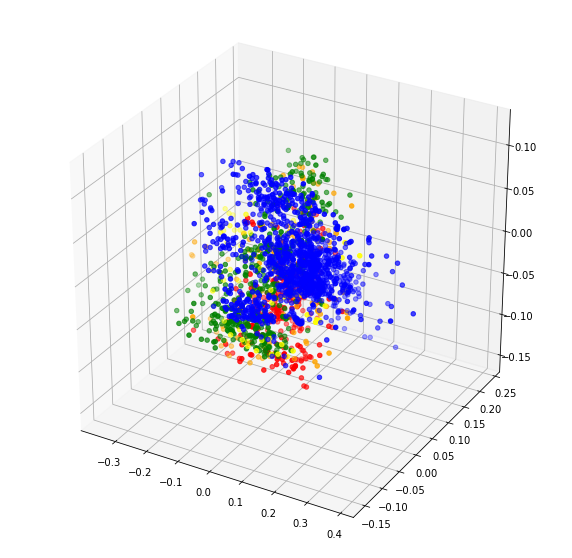

In [34]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_transform[orange, 0], X_transform[orange, 1], X_transform[orange, 2], c='orange')
ax.scatter(X_transform[red, 0], X_transform[red, 1], X_transform[red, 2], c='red')
ax.scatter(X_transform[green, 0], X_transform[green, 1], X_transform[green, 2], c='green')
ax.scatter(X_transform[blue, 0], X_transform[blue, 1], X_transform[blue, 2], c='blue')
ax.scatter(X_transform[yellow, 0], X_transform[yellow, 1], X_transform[yellow, 2], c='yellow')